## Association Rules
Source: Wikipedia

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

Based on the concept of strong rules, Rakesh Agrawal, Tomasz Imieliński and Arun Swamiintroduced association rules for discovering regularities between products in large-scale transaction data recorded by point-of-sale (POS) systems in supermarkets.    

For example, the rule $ \{\mathrm {onions,potatoes} \}\Rightarrow \{\mathrm {burger} \}$ found in the sales data of a supermarket would indicate that if a customer buys onions and potatoes together, they are likely to also buy hamburger meat. Such information can be used as the basis for decisions about marketing activities such as, e.g., promotional pricing or product placements.

In addition to the above example from market basket analysis association rules are employed today in many application areas including Web usage mining, intrusion detection, continuous production, and bioinformatics. In contrast with sequence mining, association rule learning typically does not consider the order of items either within a transaction or across transactions.

https://en.wikipedia.org/wiki/Association_rule_learning

In [ ]:
#!pip3 install mlxtend

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df = pd.DataFrame({'a':[1, 1, 0, 1, 0],
                   'b':[1, 0, 1, 0, 1],
                   'c':[1, 1, 1, 0, 1],
                   'd':[0, 1, 1, 1, 0],
                   'e':[0, 0, 0, 1, 1]})
df

### Support, Confidence, Lift

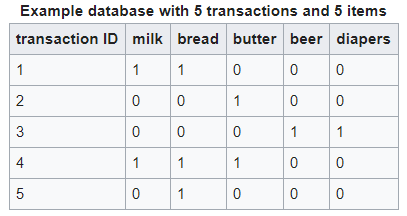

__Support__  
Support is an indication of how frequently the itemset appears in the dataset.

The support of $X$ with respect to $ T$ is defined as the proportion of transactions $ t$ in the dataset which contains the itemset $ X$

$ \mathrm {supp} (X)={\frac {|\{t\in T;X\subseteq t\}|}{|T|}}$

In the example dataset, the itemset $ X=\{\mathrm {beer,diapers} \}$
has a support of $ 1/5=0.2$ since it occurs in 20% of all transactions (1 out of 5 transactions). The argument of $ \mathrm {supp} ()$ is a set of preconditions, and thus becomes more restrictive as it grows (instead of more inclusive).

__Confidence__  
Confidence is an indication of how often the rule has been found to be true.

The confidence value of a rule, $ X\Rightarrow Y$ , with respect to a set of transactions $ T$, is the proportion of the transactions that contains $ X$ which also contains $ Y$.

Confidence is defined as:

$ \mathrm {conf} (X\Rightarrow Y)=\mathrm {supp} (X\cup Y)/\mathrm {supp} (X)$

For example, the rule $ \{\mathrm {butter,bread} \}\Rightarrow \{\mathrm {milk} \}$ has a confidence of $ 0.2/0.2=1.0$ in the database, which means that for 100% of the transactions containing butter and bread the rule is correct (100% of the times a customer buys butter and bread, milk is bought as well).

Note that $ \mathrm {supp} (X\cup Y)$ means the support of the union of the items in X and Y. This is somewhat confusing since we normally think in terms of probabilities of events and not sets of items. We can rewrite $\mathrm {supp} (X\cup Y)$ as the probability $ P(E_{X}\cap E_{Y})$, where $ E_{X}$ and $E_{Y}$ are the events that a transaction contains itemset $ X$ and $ Y$, respectively.

Thus confidence can be interpreted as an estimate of the conditional probability $ P(E_{Y}|E_{X})$, the probability of finding the RHS of the rule in transactions under the condition that these transactions also contain the LHS.

__Lift__  
The lift of a rule is defined as:

$ \mathrm {lift} (X\Rightarrow Y)={\frac {\mathrm {supp} (X\cup Y)}{\mathrm {supp} (X)\times \mathrm {supp} (Y)}}$

or the ratio of the observed support to that expected if X and Y were independent.

For example, the rule $ \{\mathrm {milk,bread} \}\Rightarrow \{\mathrm {butter} \}$ has a lift of $ {\frac {0.2}{0.4\times 0.4}}=1.25$.

If the rule had a lift of 1, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.

If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.

If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa.